# Clustering Homework
- Execute the below code and complete the following questions.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

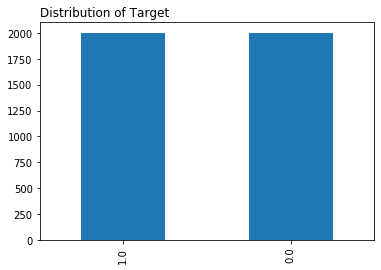

In [3]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

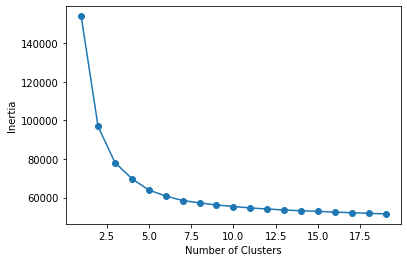

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_vars = X_train.select_dtypes('float').columns
cat_vars = X_train.select_dtypes('object').columns

n_pip = Pipeline([('sc', StandardScaler())])
c_pip = Pipeline([('ohe', OneHotEncoder(drop='first'))])

t_pip = ColumnTransformer(transformers=[('n', n_pip, num_vars), ('c', c_pip, cat_vars)])
X_chg = t_pip.fit_transform(X_train)

distortions = list()

n = 20
for i in range(1, n):
    km = KMeans(n_clusters=i, random_state=0)
    km = km.fit(X_chg)
    distortions.append(km.inertia_)
    
plt.plot(range(1, n), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

> Looks like the inertia materially flattens around 6 or 7 clusters.

In [6]:
km = KMeans(n_clusters=6, random_state=0)
km = km.fit(X_chg)
pclusters = km.predict(X_chg)
pclusters


array([5, 4, 1, ..., 0, 3, 1], dtype=int32)

In [7]:
from sklearn.decomposition import PCA

p = PCA(n_components=2)
X_2 = p.fit_transform(X_chg)

> Check the explained variance to determine if this is viable...

In [8]:
evr = p.explained_variance_ratio_.sum()
print(f'First 2 components explain {evr:.2%} of the variance.')

First 2 components explain 67.13% of the variance.


> Compressing the visualization into 2-dimensions seems reasonable. About 1/3 of the variation won't be accounted for, so be cautious in determinations.

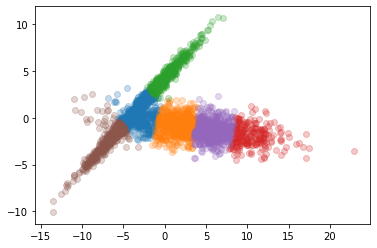

In [9]:
for i in [0,1,2,3,4,5]:
    plt.scatter(X_2[pclusters==i, 0], X_2[pclusters==i, 1], alpha=0.25)
plt.show()

> Based on 6 clusters, we can observe, in flattened space, that there two clusters in the off-diagonal that are off the main ellipsoid of the data. The main ellipsoid is broken into 4 clusters itself. This graph only accounts for 2/3's of the variation, so we won't make any significant conclusions based on the distance between clusters.

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_vars = X_train.select_dtypes('float').columns
cat_vars = X_train.select_dtypes('object').columns

n_pip = Pipeline([('sc', StandardScaler())])
c_pip = Pipeline([('ohe', OneHotEncoder(drop='first'))])

t_pip = ColumnTransformer(transformers=[('n', n_pip, num_vars), ('c', c_pip, cat_vars)])

m_pip = Pipeline([('f_procs', t_pip), ('glm', LogisticRegression(solver='liblinear'))])

params = {'glm__C': [0.01, 0.1, 1, 10, 100]}
glm_results = GridSearchCV(m_pip, param_grid=params)
glm_results = glm_results.fit(X_train, y_train)

glm_results.best_estimator_

Pipeline(steps=[('f_procs',
                 ColumnTransformer(transformers=[('n',
                                                  Pipeline(steps=[('sc',
                                                                   StandardScaler())]),
                                                  Index(['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10',
       'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18',
       'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26',
       'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34',
       'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41', 'var42',
       'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49'],
      dtype='object')),
                                                 ('c',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first')

In [11]:
glm_results.best_score_

0.940625

In [12]:
glm_pred = glm_results.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, glm_pred)

0.92875

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, glm_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



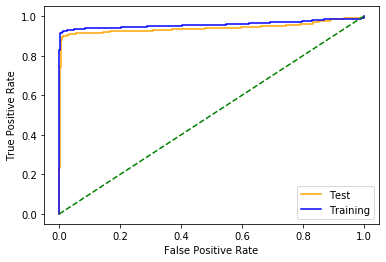

In [14]:
from sklearn.metrics import roc_curve

fpr_test, tpr_test, thr_test = roc_curve(y_test, glm_results.predict_proba(X_test)[:,1])
fpr_tr, tpr_tr, thr_tr = roc_curve(y_train, glm_results.predict_proba(X_train)[:,1])

plt.plot(fpr_test, tpr_test, 'orange')
plt.plot(fpr_tr, tpr_tr, 'blue')
plt.plot(fpr_tr, fpr_tr, color='green', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.show()

> ROC shows the trade-off between the FPR and TPR - aside from very low tolerance values the model doesn't seem to differ in the trade-off at most thresholds beyond 0.5, as visualized by the flatness of the ROC curve.

> Search finer space for better hyperparameters:

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_vars = X_train.select_dtypes('float').columns
cat_vars = X_train.select_dtypes('object').columns

n_pip = Pipeline([('sc', StandardScaler())])
c_pip = Pipeline([('ohe', OneHotEncoder(drop='first'))])

t_pip = ColumnTransformer(transformers=[('n', n_pip, num_vars), ('c', c_pip, cat_vars)])

m_pip = Pipeline([('f_procs', t_pip), ('glm', LogisticRegression(solver='liblinear'))])

params = {'glm__C': [0.5, 0.75, 0.1, 2.5, 5, 7.5]}
glm_results = GridSearchCV(m_pip, param_grid=params)
glm_results = glm_results.fit(X_train, y_train)

glm_results.best_estimator_

Pipeline(steps=[('f_procs',
                 ColumnTransformer(transformers=[('n',
                                                  Pipeline(steps=[('sc',
                                                                   StandardScaler())]),
                                                  Index(['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10',
       'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18',
       'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26',
       'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34',
       'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41', 'var42',
       'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49'],
      dtype='object')),
                                                 ('c',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first')

In [16]:
glm_results.best_score_

0.940625

> Slightly higher score using 0.75 as our value for regularization, which indicates more regularization than our initial model.

In [17]:
glm_pred = glm_results.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, glm_pred)

0.92875

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, glm_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



> No difference in performance on the test set though.

In [19]:
fpr1_test, tpr1_test, thr1_test = roc_curve(y_test, glm_results.predict_proba(X_test)[:,1])

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

num_vars = X_train.select_dtypes('float').columns
cat_vars = X_train.select_dtypes('object').columns

n_pip = Pipeline([('sc', StandardScaler())])
c_pip = Pipeline([('ohe', OneHotEncoder(drop='first'))])

t_pip = ColumnTransformer(transformers=[('n', n_pip, num_vars), ('c', c_pip, cat_vars)])

m_pip = Pipeline([('f_procs', t_pip),
                  ('pca', PCA()),
                  ('glm', LogisticRegression(solver='liblinear'))])

params = {'glm__C': [0.01, 0.1, 1, 10, 100], 'pca__n_components': [2, 5, 10, 15, 20, 25, 30]}
glm_results2 = GridSearchCV(m_pip, param_grid=params)
glm_results2 = glm_results2.fit(X_train, y_train)

glm_results2.best_estimator_

Pipeline(steps=[('f_procs',
                 ColumnTransformer(transformers=[('n',
                                                  Pipeline(steps=[('sc',
                                                                   StandardScaler())]),
                                                  Index(['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10',
       'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18',
       'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26',
       'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34',
       'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41', 'var42',
       'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49'],
      dtype='object')),
                                                 ('c',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first')

In [21]:
glm_results2.best_score_

0.9503125000000001

In [22]:
glm_pred2 = glm_results2.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, glm_pred2)

0.93125

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, glm_pred2))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



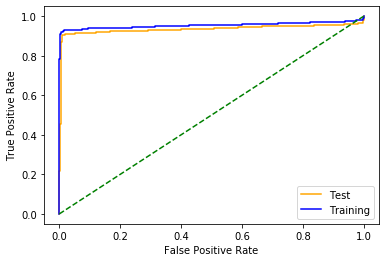

In [24]:
from sklearn.metrics import roc_curve

fpr_test, tpr_test, thr_test = roc_curve(y_test, glm_results2.predict_proba(X_test)[:,1])
fpr_tr, tpr_tr, thr_tr = roc_curve(y_train, glm_results2.predict_proba(X_train)[:,1])

plt.plot(fpr_test, tpr_test, 'orange')
plt.plot(fpr_tr, tpr_tr, 'blue')
plt.plot(fpr_tr, fpr_tr, color='green', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.show()

> Similar shape to the ROC curve as #2. No need to search threshold values as we are observing a very steep and flat ROC curve, i.e., no performance difference across values.  

> Perform a more refined hyperparameter search:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

num_vars = X_train.select_dtypes('float').columns
cat_vars = X_train.select_dtypes('object').columns

n_pip = Pipeline([('sc', StandardScaler())])
c_pip = Pipeline([('ohe', OneHotEncoder(drop='first'))])

t_pip = ColumnTransformer(transformers=[('n', n_pip, num_vars), ('c', c_pip, cat_vars)])

m_pip = Pipeline([('f_procs', t_pip),
                  ('pca', PCA()),
                  ('glm', LogisticRegression(solver='liblinear'))])

params = {'glm__C': [2, 3, 4, 5, 6, 7, 8, 9], 'pca__n_components': [3, 4, 5, 6, 7]}
glm_results2 = GridSearchCV(m_pip, param_grid=params)
glm_results2 = glm_results2.fit(X_train, y_train)

glm_results2.best_estimator_

Pipeline(steps=[('f_procs',
                 ColumnTransformer(transformers=[('n',
                                                  Pipeline(steps=[('sc',
                                                                   StandardScaler())]),
                                                  Index(['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10',
       'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18',
       'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26',
       'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34',
       'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41', 'var42',
       'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49'],
      dtype='object')),
                                                 ('c',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first')

In [26]:
glm_results2.best_score_

0.9503125000000001

In [27]:
glm_pred2 = glm_results2.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, glm_pred2)

0.93125

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, glm_pred2))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



> Found slightly different hyperparameters on the second pass, no difference in performance though.

In [29]:
fpr2_test, tpr2_test, thr_test = roc_curve(y_test, glm_results2.predict_proba(X_test)[:,1])

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

num_vars = X_train.select_dtypes('float').columns
cat_vars = X_train.select_dtypes('object').columns

n_pip = Pipeline([('sc', StandardScaler())])
c_pip = Pipeline([('ohe', OneHotEncoder(drop='first'))])

t_pip = ColumnTransformer(transformers=[('n', n_pip, num_vars), ('c', c_pip, cat_vars)])

m_pip = Pipeline([('f_procs', t_pip),
                  ('clust', KMeans()),
                  ('tr', LogisticRegression(solver='liblinear'))])

params = {'tr__C': [0.01, 0.1, 1, 10, 100],
          'clust__n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
         }
tr_results = GridSearchCV(m_pip, param_grid=params)
tr_results = tr_results.fit(X_train, y_train)

tr_results.best_estimator_

Pipeline(steps=[('f_procs',
                 ColumnTransformer(transformers=[('n',
                                                  Pipeline(steps=[('sc',
                                                                   StandardScaler())]),
                                                  Index(['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10',
       'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18',
       'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26',
       'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34',
       'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41', 'var42',
       'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49'],
      dtype='object')),
                                                 ('c',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first')

In [31]:
tr_results.best_score_

0.9556250000000001

In [32]:
tr_pred = tr_results.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, tr_pred)

0.94375

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tr_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       394
         1.0       0.99      0.89      0.94       406

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.95      0.94      0.94       800



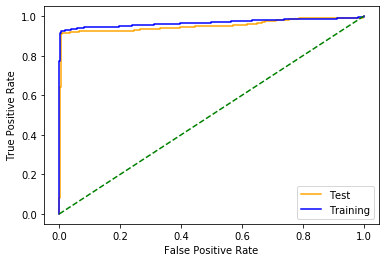

In [34]:
from sklearn.metrics import roc_curve

fpr_test, tpr_test, thr_test = roc_curve(y_test, tr_results.predict_proba(X_test)[:,1])
fpr_tr, tpr_tr, thr_tr = roc_curve(y_train, tr_results.predict_proba(X_train)[:,1])

plt.plot(fpr_test, tpr_test, 'orange')
plt.plot(fpr_tr, tpr_tr, 'blue')
plt.plot(fpr_tr, fpr_tr, color='green', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.show()

> Similar to #2 and #3 with regarding to the shape of the ROC curve. Likely little gains in evaluating different parameter values.


> Performing refined search:

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

num_vars = X_train.select_dtypes('float').columns
cat_vars = X_train.select_dtypes('object').columns

n_pip = Pipeline([('sc', StandardScaler())])
c_pip = Pipeline([('ohe', OneHotEncoder(drop='first'))])

t_pip = ColumnTransformer(transformers=[('n', n_pip, num_vars), ('c', c_pip, cat_vars)])

m_pip = Pipeline([('f_procs', t_pip),
                  ('clust', KMeans()),
                  ('tr', LogisticRegression(solver='liblinear'))])

params = {'tr__C': [0.1, 0.35, 0.70, 1, 2, 5, 7, 10],
          'clust__n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
         }
tr_results = GridSearchCV(m_pip, param_grid=params)
tr_results = tr_results.fit(X_train, y_train)

tr_results.best_estimator_

Pipeline(steps=[('f_procs',
                 ColumnTransformer(transformers=[('n',
                                                  Pipeline(steps=[('sc',
                                                                   StandardScaler())]),
                                                  Index(['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10',
       'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18',
       'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26',
       'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34',
       'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41', 'var42',
       'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49'],
      dtype='object')),
                                                 ('c',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first')

In [36]:
tr_results.best_score_

0.9556250000000001

In [37]:
tr_pred = tr_results.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, tr_pred)

0.9425

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tr_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       394
         1.0       0.99      0.89      0.94       406

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.95      0.94      0.94       800



> No significant differences between searches.

In [39]:
fpr3_test, tpr3_test, thr_test = roc_curve(y_test, tr_results.predict_proba(X_test)[:,1])

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

> Differences in performance statistics:

In [40]:
print('Logistic Regression:')
print(classification_report(y_test, glm_pred))

print('Logistic Regression w/ PCA:')
print(classification_report(y_test, glm_pred2))

print('Logistic Regression w/ Clustering:')
print(classification_report(y_test, tr_pred))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800

Logistic Regression w/ PCA:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800

Logistic Regression w/ Clustering:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       394
         1.0       0.99      0.89      0.94       406

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94 

The modeling with clustering has slightly higher statistics than the other models, though it likely isn't statistically significant. Precision is essentially identical across models, however, the clustering model as 2-3 point higher recall than the other models.

> Differences in the ROC curves:

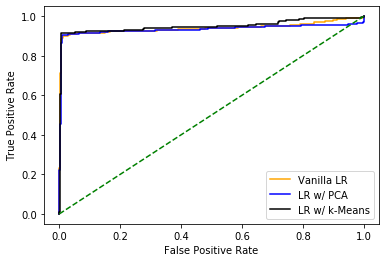

In [41]:
plt.plot(fpr1_test, tpr1_test, 'orange')
plt.plot(fpr2_test, tpr2_test, 'blue')
plt.plot(fpr3_test, tpr3_test, 'black')
plt.plot(fpr_tr, fpr_tr, color='green', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Vanilla LR','LR w/ PCA', 'LR w/ k-Means'])
plt.show()

ROC curves are almost identical, slightly bigger AUC for the LR that used k-Means.

In [42]:
from sklearn.metrics import roc_auc_score

vanilla = roc_auc_score(y_test, glm_results.predict_proba(X_test)[:,1]) 
w_pca = roc_auc_score(y_test, glm_results2.predict_proba(X_test)[:,1])
w_kmn = roc_auc_score(y_test, tr_results.predict_proba(X_test)[:,1])

print(f'Vanilla LR AUC: {vanilla:.2%}')
print(f'LR w/ PCA AUC: {w_pca:.2%}')
print(f'LR w/ k-Means AUC: {w_kmn:.2%}')

Vanilla LR AUC: 93.93%
LR w/ PCA AUC: 93.38%
LR w/ k-Means AUC: 95.01%


> Based on slightly better performance statistics (accuracy and recall) and larger AUC for the ROC curves, the k-means preprocessing seems to produce the best model, though the others are close. Since there wasn't a significant runtime difference, we should go with the k-Means model.